In [1]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:
df = pd.read_csv('final_db_cleaned.csv', low_memory=False)
size = df.shape[0]

select_list = []
for i in range(0, 100):
    select_list.append(random.randint(1, size-1))

result_dict = {}
for i in df.columns:
    temp = []
    for j in select_list:
        temp.append(df[i][j])
    result_dict[i] = temp

for i in result_dict.keys():
    print(f"column {i} has entries: \n {result_dict[i]} \n column type of: {type(df[i][select_list[0]])}")

print(len(df.index))

column Unnamed: 0 has entries: 
 [287262, 486412, 390474, 571569, 866729, 481879, 518245, 596431, 531234, 592746, 351120, 605778, 166240, 747089, 549701, 640794, 305663, 196849, 871664, 604192, 815875, 209095, 282118, 864318, 807032, 579865, 564631, 278670, 905100, 796463, 399831, 236693, 573184, 346723, 714957, 473209, 326692, 702698, 718545, 665637, 727923, 362667, 295837, 457670, 619539, 147590, 652719, 692310, 287159, 527488, 212370, 600180, 380464, 419309, 818159, 656068, 771226, 843853, 454423, 644755, 692029, 415009, 787129, 648746, 706295, 506808, 546633, 420737, 588719, 373260, 903905, 755010, 467195, 787152, 465631, 751589, 877342, 830036, 804102, 571919, 493819, 219825, 253617, 249571, 903110, 449889, 574961, 279673, 377447, 893378, 778550, 349754, 804295, 161779, 597589, 282743, 377636, 606797, 176017, 891842] 
 column type of: <class 'numpy.int64'>
column #stm_sap_meldnr has entries: 
 [80424885, 80674386, 80554270, 80733755, 80903160, 80668662, 80706300, 80748073, 8071354

In [3]:
numeric_columns = []
for i in df.columns:
    if isinstance(df[i][1], (numpy.float64, numpy.int64)):
        numeric_columns.append(i)
        
print(df.isna().sum())

Unnamed: 0                   0
#stm_sap_meldnr              0
stm_mon_nr                   0
stm_sap_meld_ddt             0
stm_sap_meldtekst_lang       0
                            ..
stm_fh_duur                  0
stm_reactie_duur             0
stm_sap_storeinddatum        0
stm_sap_storeindtijd         0
totale_functiehersteltijd    0
Length: 61, dtype: int64


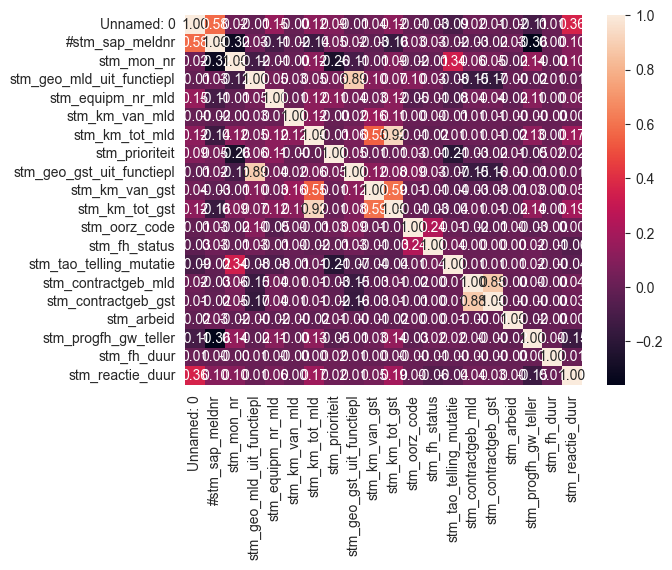

In [9]:
cmatrix = df[numeric_columns].corr().dropna(how='all', axis=1).dropna(how='all')
sns.heatmap(cmatrix, annot=True, fmt='.2f')
plt.show()
plt.close()

In [8]:
for i in numeric_columns:
    j = df[i].max()
    j1 = df.loc[df[i] == j, i].count()
    k = df[i].min()
    k1 = df.loc[df[i] == k, i].count()
    l = df.shape[0]
    print(f"all rows: {l}")
    print(f"column {i} has: \n  min: {k}, count: {k1} \n  max: {j}, count: {j1} ")

all rows: 425989
column Unnamed: 0 has: 
  min: 103158, count: 1 
  max: 908629, count: 1 
all rows: 425989
column #stm_sap_meldnr has: 
  min: 50148173, count: 1 
  max: 99999999, count: 2 
all rows: 425989
column stm_mon_nr has: 
  min: 0.0, count: 300469 
  max: 5748615.0, count: 1 
all rows: 425989
column stm_geo_mld_uit_functiepl has: 
  min: 0.0, count: 3 
  max: 952.0, count: 715 
all rows: 425989
column stm_equipm_nr_mld has: 
  min: 10000012.0, count: 107 
  max: 30052802.0, count: 2 
all rows: 425989
column stm_km_van_mld has: 
  min: 0.0, count: 135247 
  max: 60844493.0, count: 5 
all rows: 425989
column stm_km_tot_mld has: 
  min: 0.0, count: 306911 
  max: 908200.0, count: 5 
all rows: 425989
column stm_prioriteit has: 
  min: 1.0, count: 1934 
  max: 9.0, count: 1373 
all rows: 425989
column stm_geo_gst_uit_functiepl has: 
  min: 0.0, count: 3 
  max: 952.0, count: 207 
all rows: 425989
column stm_km_van_gst has: 
  min: 0.0, count: 165088 
  max: 10642375.0, count: 1 
a

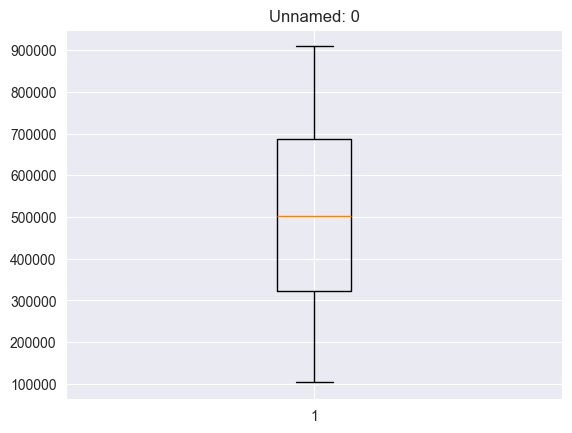

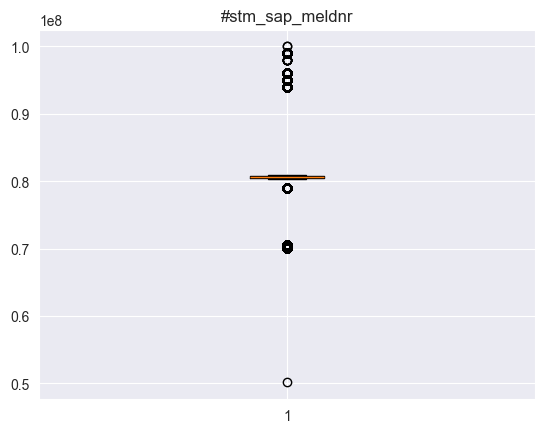

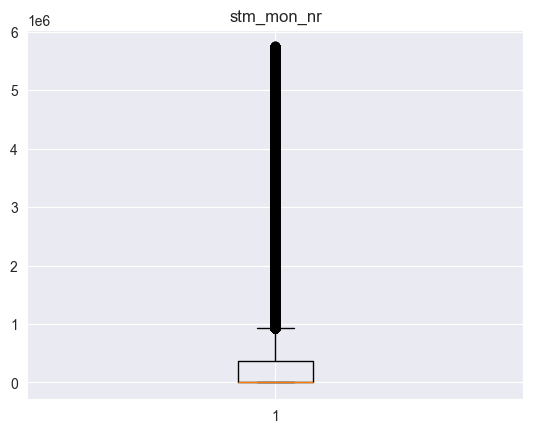

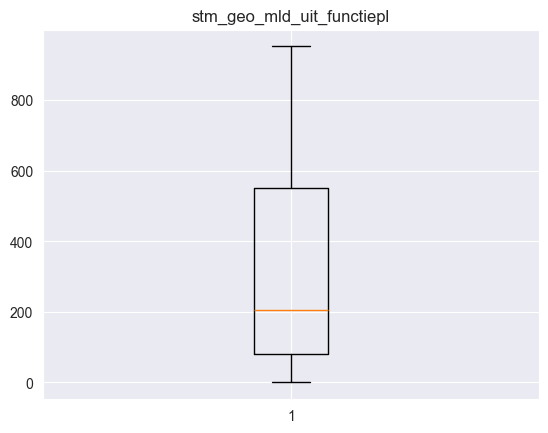

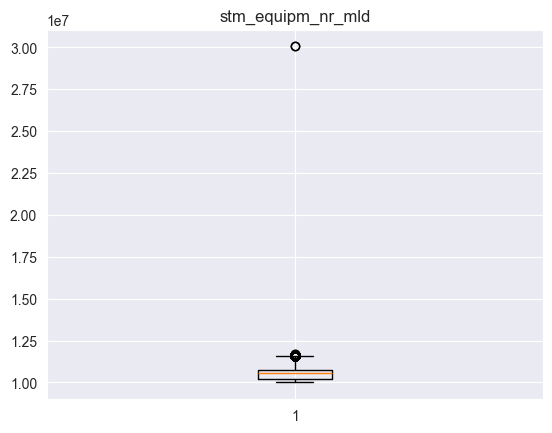

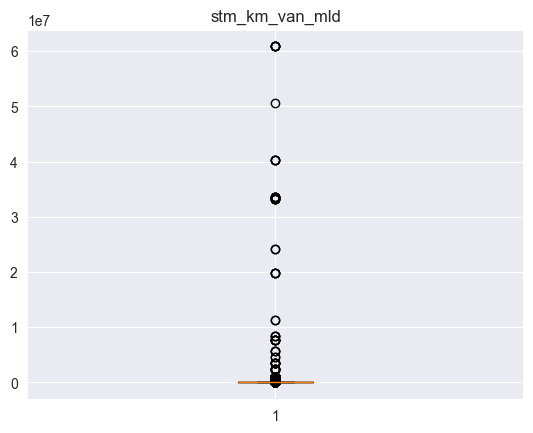

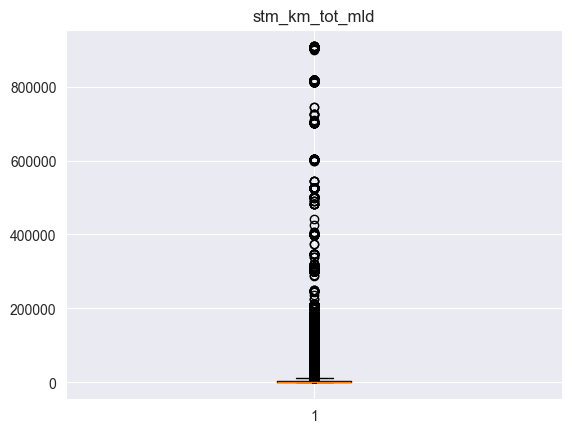

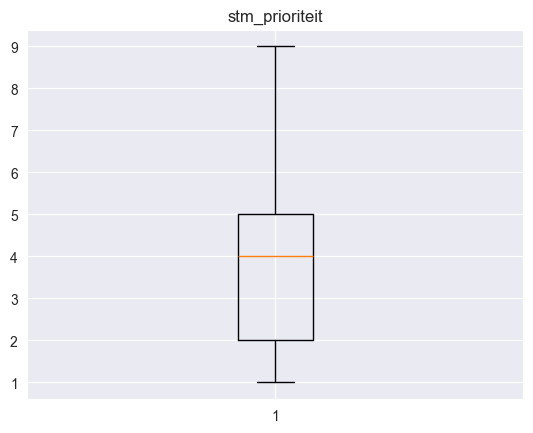

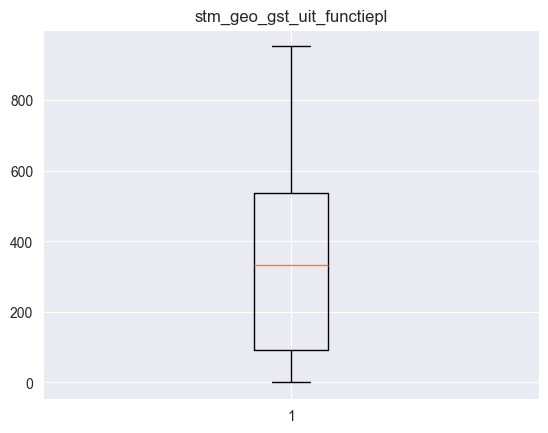

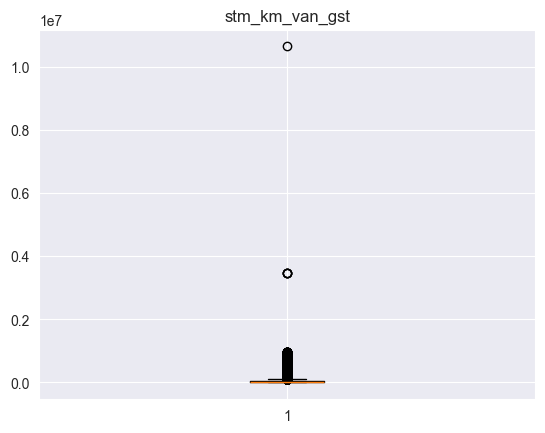

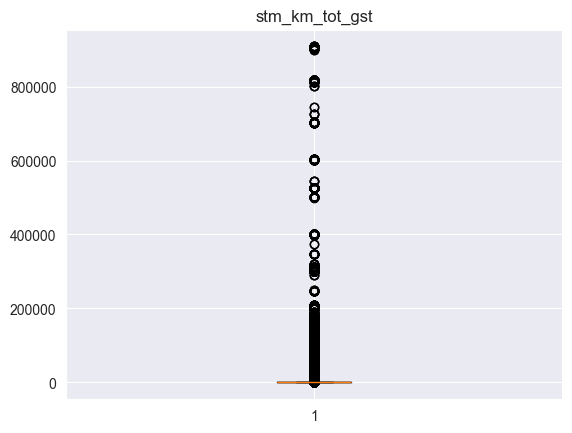

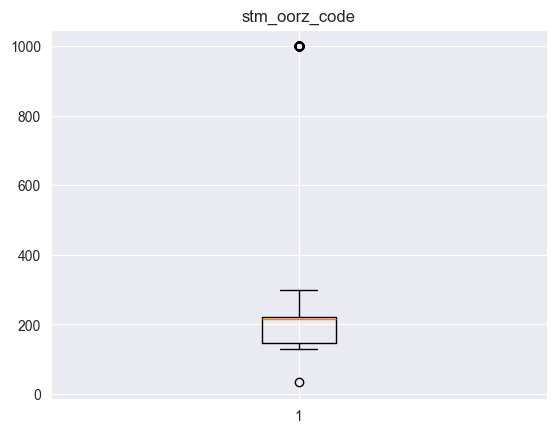

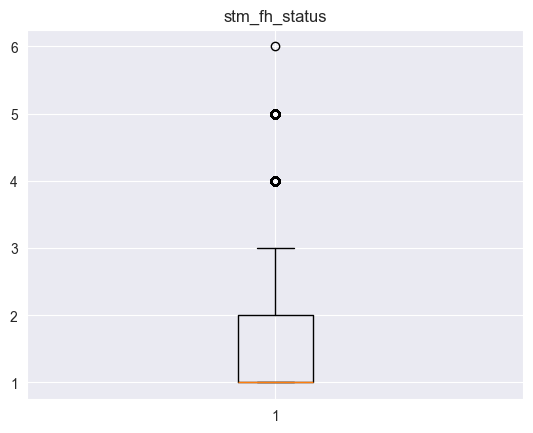

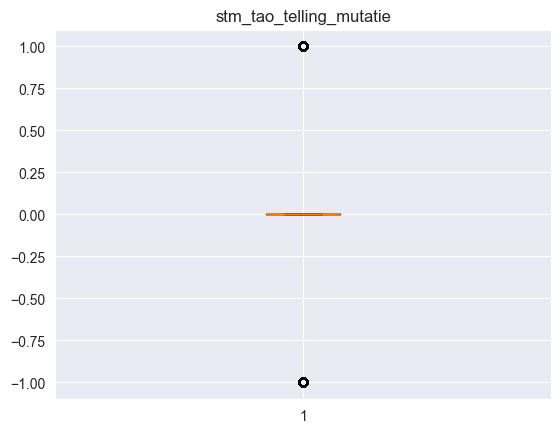

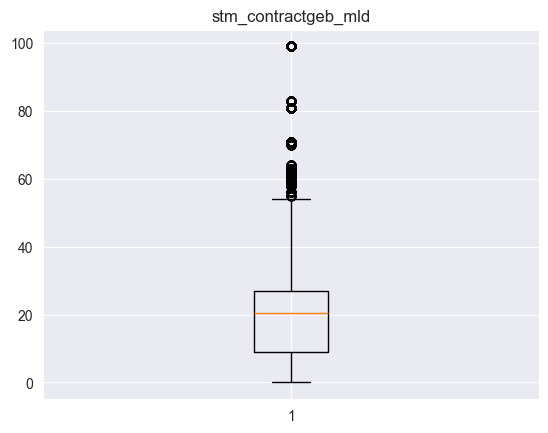

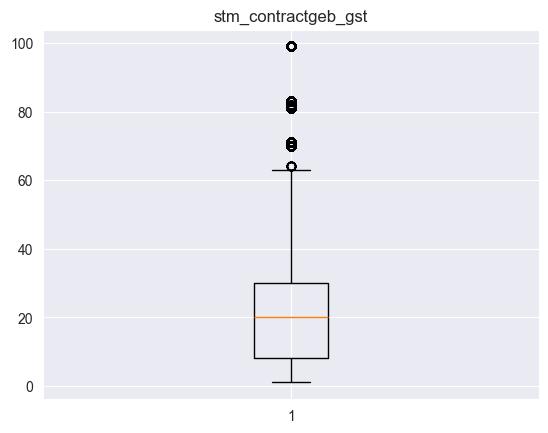

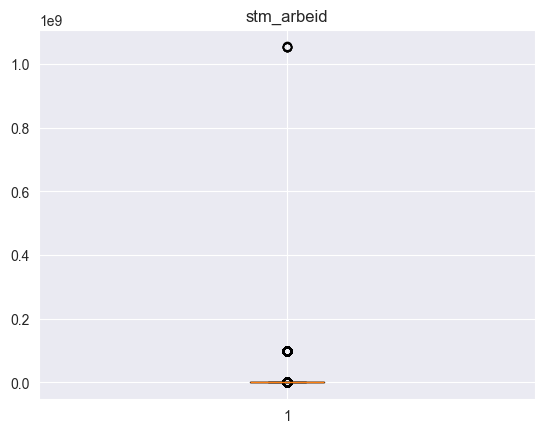

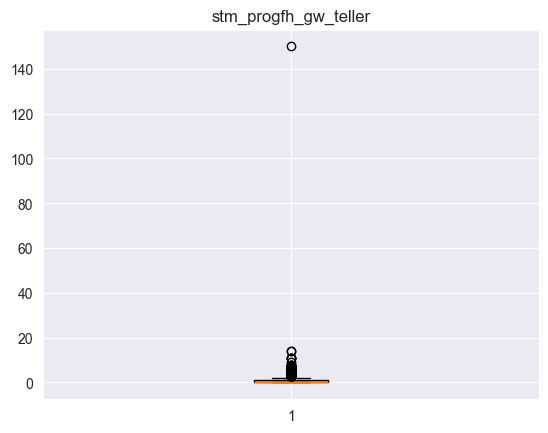

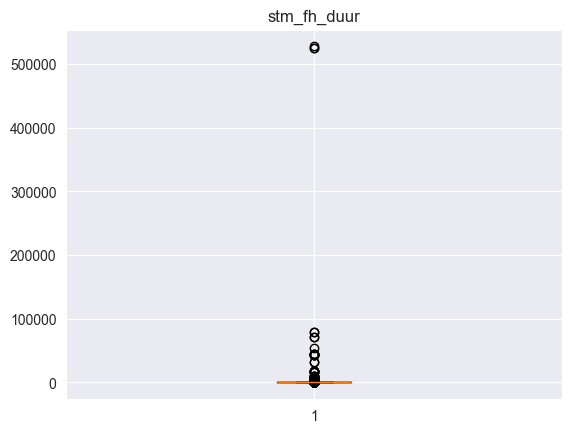

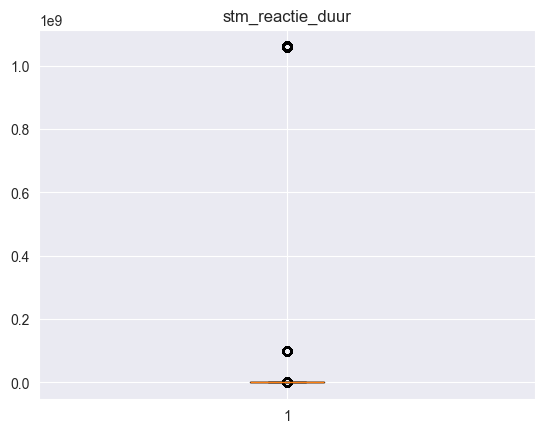

In [13]:
for i in numeric_columns:
    a = df[i]
    plt.boxplot(a)
    plt.title(i)
    plt.show()

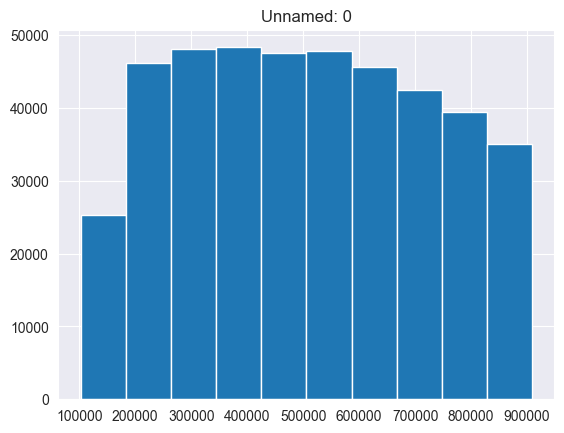

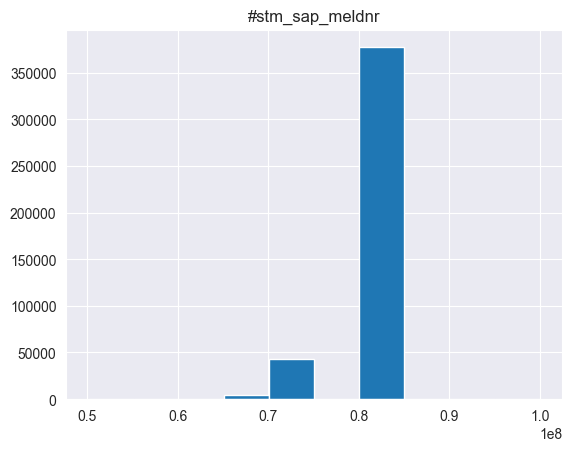

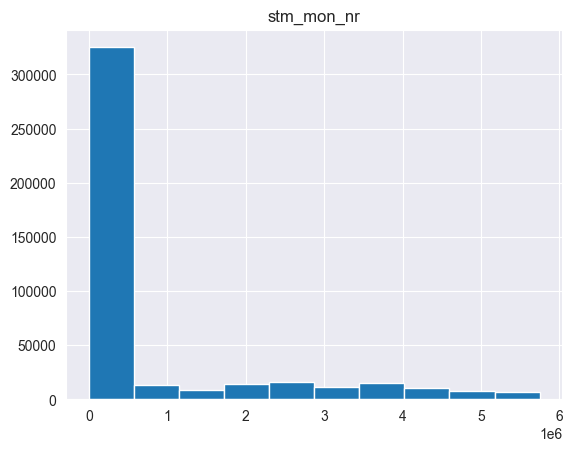

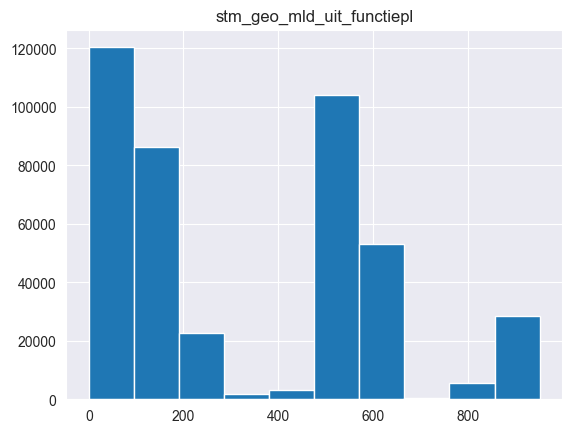

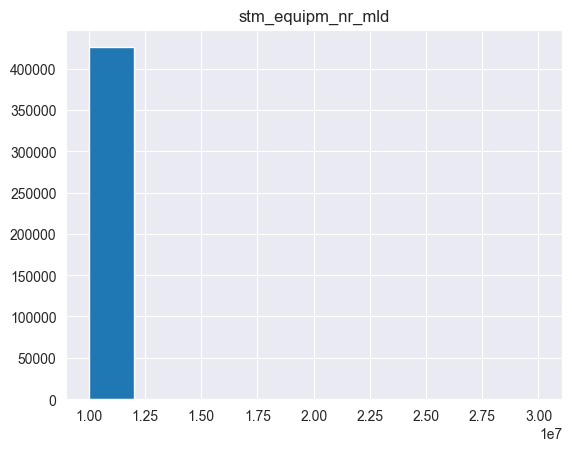

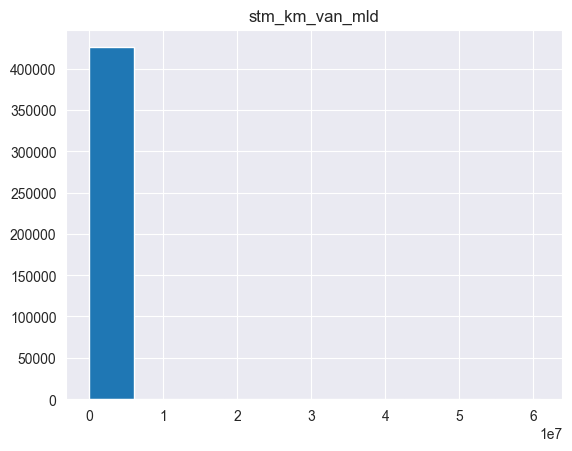

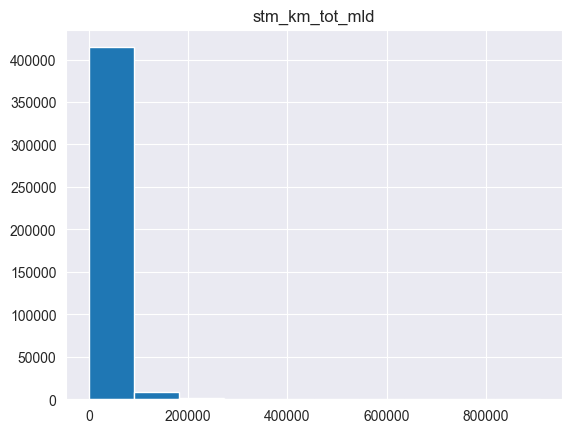

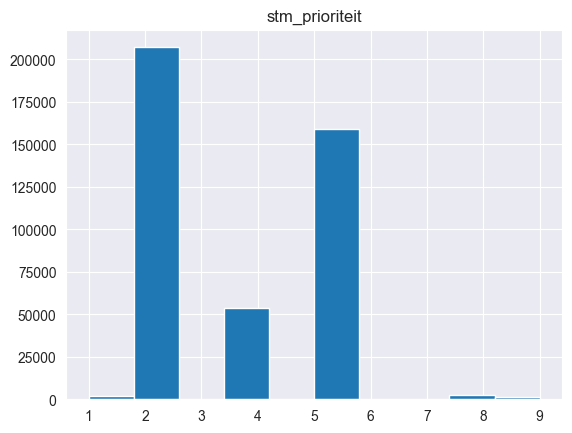

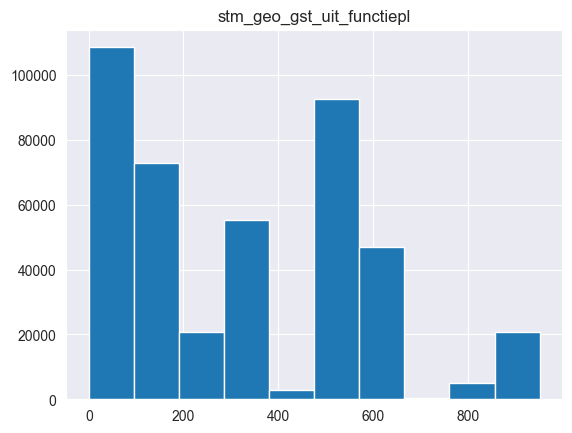

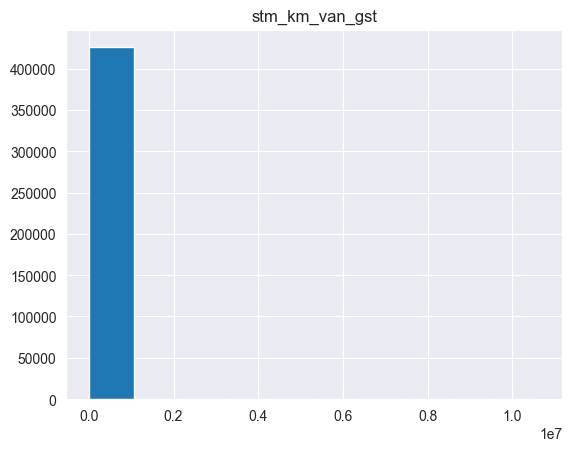

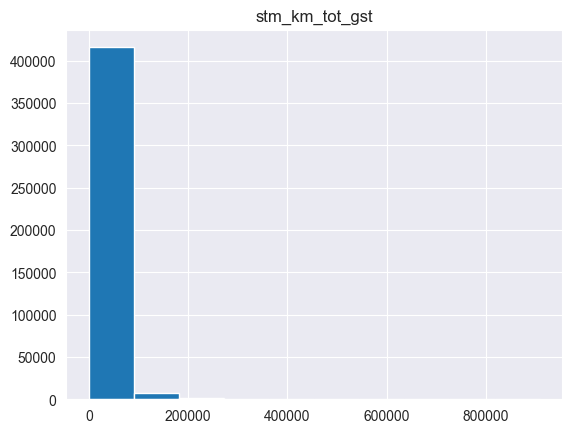

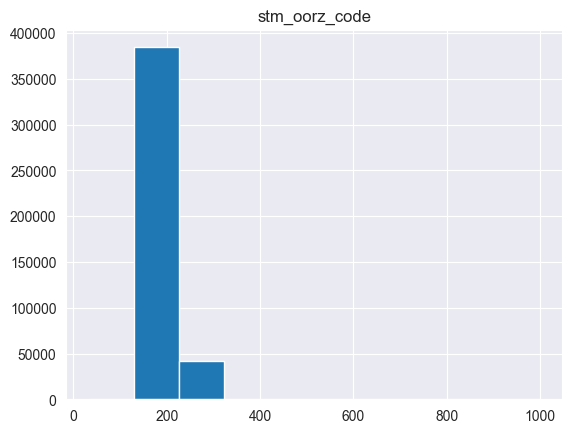

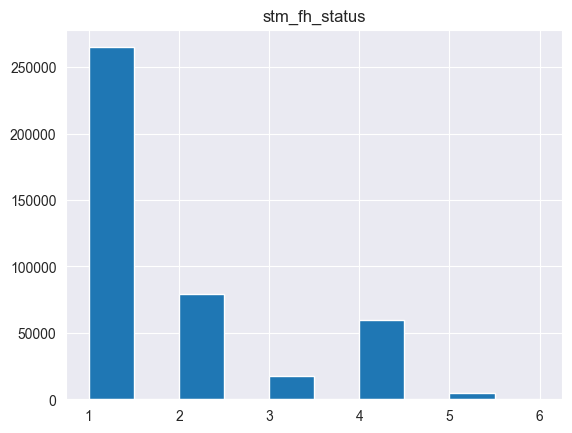

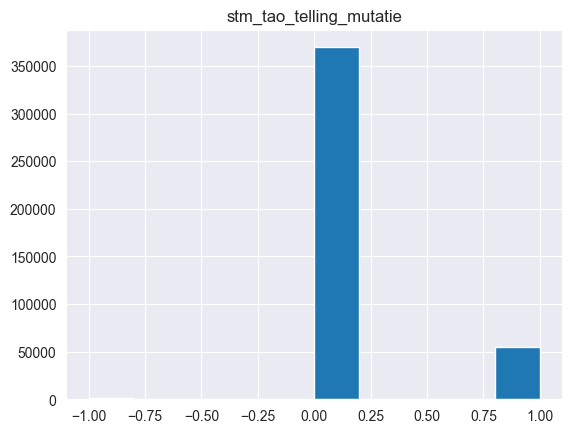

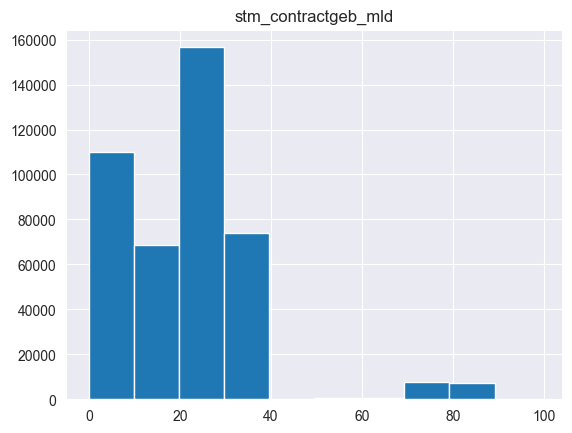

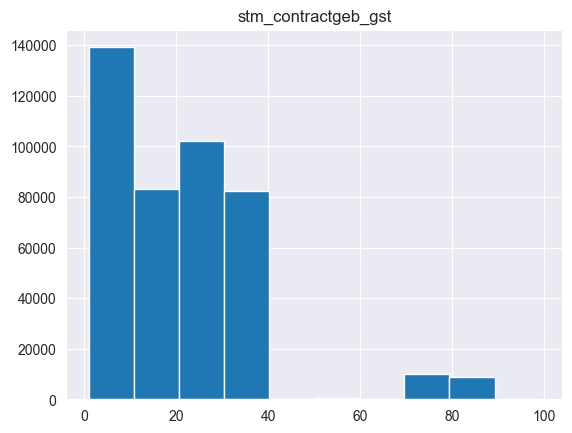

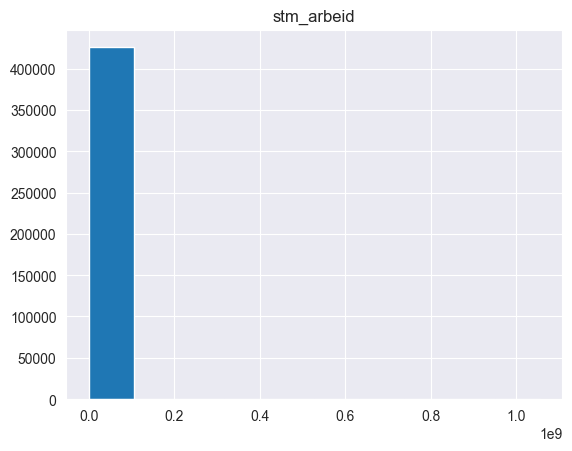

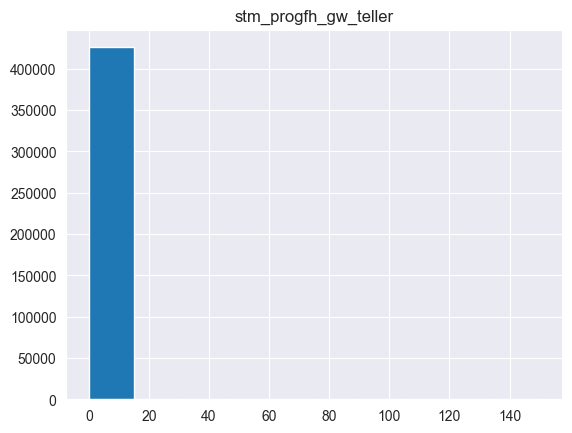

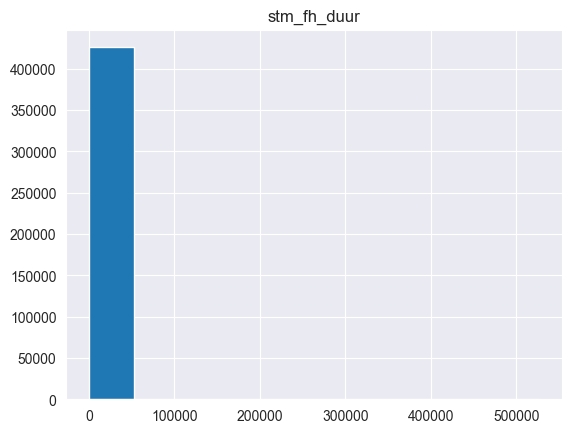

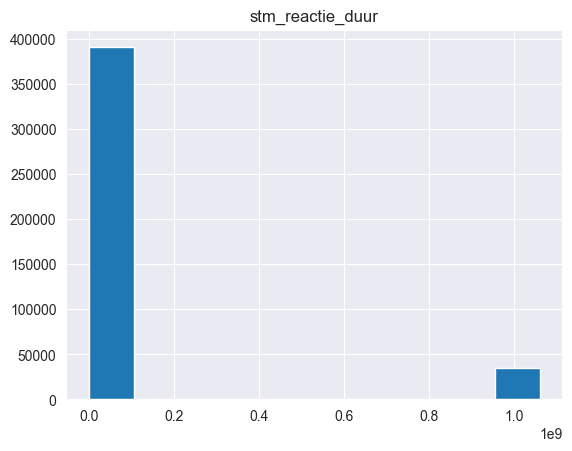

In [14]:
for i in numeric_columns:
    a = df[i]
    plt.hist(a)
    plt.title(i)
    plt.show()

## kolommen om te cleanen:
#### reactie duur
#### arbeid
#### alle km kolommen 
